In [2]:
/*------------------------------------
* Created :       21/07/2017  (fr)  
* Last update :   21/07/2017  (fr)   
* Author(s) : Nicolas Dupont         
* Contributor(s) :        
* Tested on SAS Studio 9.4 onDemand        
-------------------------------------*/


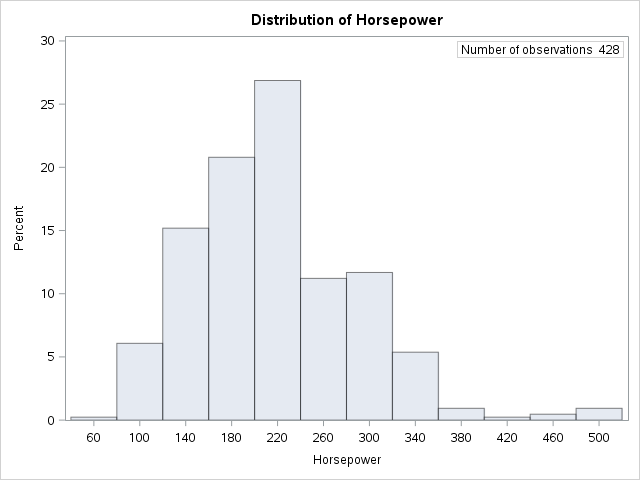
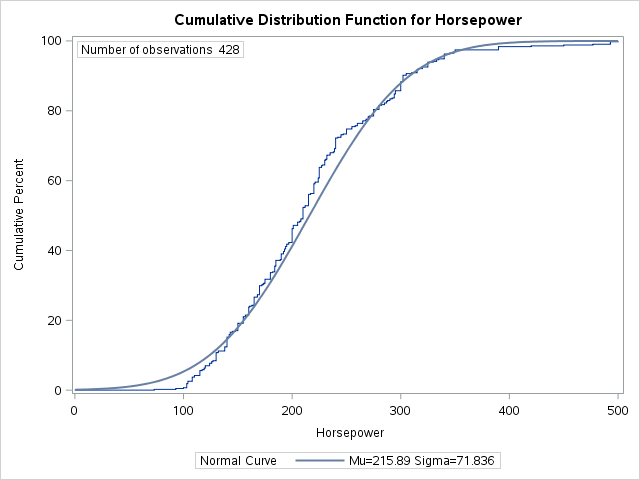

In [3]:
/* With proc univariate : */

%macro ecdf(data,var);

	title "Descriptive statistics on &var.";
	proc univariate data=&data;
	   var &var;
	run;
	
	title "Distribution of &var.";
	proc univariate data=&data noprint;
   		histogram &var / odstitle = title;
   		inset n = 'Number of observations' / position=ne;
	run;
	
	title "Cumulative Distribution of &var.";
	proc univariate data=&data noprint;
   		cdf &var / normal;
   		/*inset normal(mu sigma);*/
   		inset n = 'Number of observations' / position=nw;
	run;
	
	title;

%mend ecdf;

%ecdf(sashelp.cars,Horsepower);


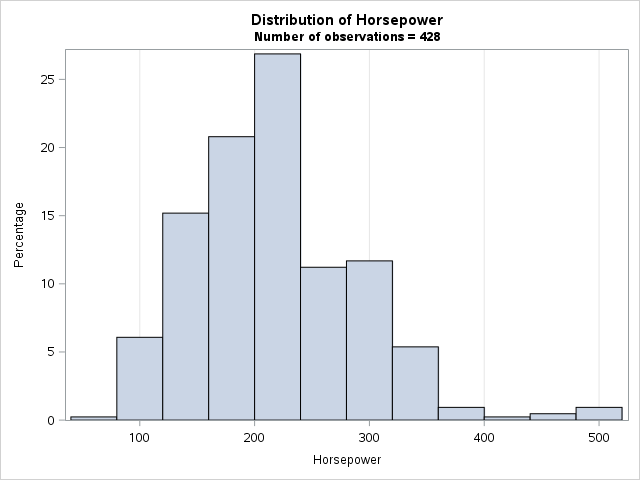
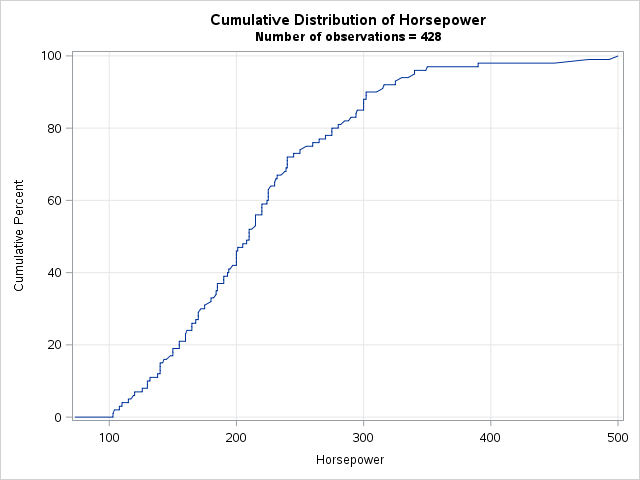

In [4]:
/* Without the proc inivariate : */

%macro ecdf2(data,var);

	data tmp (keep=&var);
		set &data.;
	run;
	
	proc sort data=tmp;
	   by &var.;
	run;
	
	data tmp;
		set tmp nobs=obs;
		nv = _N_;
		p = nv/obs;
	    ecdf = int(p*100); 
	    call symput("nbvalue",compress(nv)); 
	run;
	proc sort data=tmp; by nv; run;
	
	
	/*
	title "Cumulative Distribution of &var.";
	symbol1 i=j v=none c=blue;
	proc gplot data=tmp;
	   plot ecdf * &var;
	run;
	quit;
	title;
	*/
	title "Distribution of &var.";
	title2 "Number of observations = &nbvalue";
	proc sgplot data=tmp;
		histogram &var;
		XAXIS label="&var" grid;
  		YAXIS label="Percentage";
	run;
	
	title "Cumulative Distribution of &var.";
	title2 "Number of observations = &nbvalue";
	proc sgplot data=tmp;
  		series x=&var y=ecdf;
  		XAXIS label="&var" grid;
  		YAXIS label="Cumulative Percent" grid;
	run;
	title;
	title2;

%mend ecdf2;

%ecdf2(sashelp.cars,Horsepower);